In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library
import requests

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the API key
from config import weather_api_key
# Import the datatime module from the datatime library
from datetime import datetime

In [3]:
# starting URL
# url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
#base_url = f"http://api.openweathermap.org/data/2.5/weather?"
#url = f"http://api.openweathermap.org/data/2.5/weather?q={city}"


In [4]:
# Create a set of random latitude and longitude combinations. 
lat = np.random.uniform(low=-90.000, high=90.000, size=20)
lngs = np.random.uniform(low=-180.000, high=180.000, size=20)
lat_lngs = zip(lat, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# # Create an empty list to hold the weather data
cities_test = []

for coordinate in coordinates:
    print(coordinate)
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities_test:
        cities_test.append(city)
len(cities_test)

(-1.1069708262897677, 14.248402604706257)
(-4.998743696629106, -117.85679143413779)
(-21.66589458189631, -170.94689324165154)
(15.40664831009947, -68.34867361696905)
(-51.273642058984365, 156.97564862563036)
(88.32816796184684, -159.25970464268988)
(-39.25129625253673, 75.69834610879002)
(-48.6503147605723, -19.2466104202216)
(41.257260419853594, -8.28910328798554)
(-34.651914593867026, -29.07316129121483)
(-59.4418239759933, 20.316403186535155)
(-16.311431900865472, 140.46709291094072)
(69.32755257905777, 15.061678461560234)
(-88.63697836378766, 35.96344288372234)
(-62.22767841731532, -34.090990107414086)
(15.302024452429393, 114.9523569515652)
(-69.07246434043363, 87.63648424377385)
(77.98795108658311, 161.84459540677682)
(22.192106834086616, -58.853175873060906)
(26.897968865269704, -4.832697951587335)


19

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

19

In [7]:
# city = "east london"
# city_test_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
# city_weather = requests.get(city_test_url).json
# print(city_weather)

In [8]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

import time
import sys

# Create counters.
record_count = 1
set_count = 1
#url = f"http://api.openweathermap.org/data/2.5/weather?q={city}"
url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}" 
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    time.sleep(1)

    # Group cities in sets of 50 for logging purposes
    if (i % 20 == 0 and i >= 20):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    # city_url = url + city.replace(" ", "+") + "&appid={weather_api_key}"
    #city_url = url + f"&appid={weather_api_key}"
    city_url = url + "&q=" + f"{city}"
    # print(weather_api_key)
    # print(city)
    # print(city_url)
    # sys.exit()
    # Log the URL, record and set numbers and the city 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.                           
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lekoni
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | cabo rojo
Processing Record 5 of Set 1 | tuatapere
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | meinedo
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | mount isa
Processing Record 12 of Set 1 | sortland
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | aloleng
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | taoudenni
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# # Create an endpoint URL for a city.
# url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}" 
# city_url = url + "&q=" + "Boston"
# city_weather = requests.get(city_url)
# if city_weather.status_code == 200:
#     print(f"City Weather found.")
# else:
#     print(f"City weather not found.")

In [12]:
# # Create an empty list to hold the weather data
# city_data = []
# # Print the beginning of the logging
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# import time
# import sys

# # Create counters.
# record_count = 1
# set_count = 1
# url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}" 
# # Loop through all the cities in our list.
# for i, city in enumerate(cities):
    
#     time.sleep(1)

#     # Group cities in sets of 50 for logging purposes
#     if (i % 20 == 0 and i >= 20):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city
#     city_url = url + "&q=" + f"{city}"
#     # Log the URL, record and set numbers and the city 
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count
#     record_count += 1
#     # Run an API request for each of the cities.
#     try: 
#         # Parse the JSON and retrieve data
#         city_weather = requests.get(city_url).json()
#         # Parse out the needed data
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#                             "Lat": city_lat,
#                             "Lng": city_lng,
#                             "Max Temp": city_max_temp,
#                             "Humidity": city_humidity,
#                             "Cloudiness": city_clouds,
#                             "Wind Speed": city_wind,
#                             "Country": city_country,
#                             "Date": city_date})

# # If an error is experienced, skip the city.                           
#     except:
#         print("City not found. Skipping...")
#         pass

# # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | constantine
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | saschiz
Processing Record 7 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | isiro
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | tukrah
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | brae
Processing Record 17 of Set 1 | wenling
Processing Record 18 of Set 1 | cap malheureux
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | busselton
-----------------------------
Data Retrieval Complete      

In [10]:
# Convert the array of dictionaries to a Panda Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0            Lekoni  -1.5843   14.2591    300.57        64         100   
1            Atuona  -9.8000 -139.0333    299.69        62           1   
2             Alofi -19.0595 -169.9187    297.09        94          42   
3         Cabo Rojo  18.0866  -67.1457    305.22        70          46   
4         Tuatapere -46.1333  167.6833    283.05        96         100   
5            Barrow  71.2906 -156.7887    272.16        86          90   
6         Mahebourg -20.4081   57.7000    296.07        94          40   
7   Arraial Do Cabo -22.9661  -42.0278    299.13        73          75   
8           Meinedo  41.2483   -8.2581    298.14        62           0   
9        Bredasdorp -34.5322   20.0403    283.77        93          46   
10        Mount Isa -20.7333  139.5000    284.02        50           9   
11         Sortland  68.6949   15.4162    281.13        89         100   
12   Port Elizabeth -33.9180   25.5701    288.20        72           0   
13    Mar Del Plata -38.0023  -57.5575    287.59        42           0   
14          Aloleng  16.1307  119.7824    301.72        80          32   
15        Busselton -33.6500  115.3333    285.98        65         100   
16         Cherskiy  68.7500  161.3000    286.42        39           0   
17       Codrington -38.2667  141.9667    277.76        67           5   
18        Taoudenni  22.6783   -3.9836    315.85         7         100   

    Wind Speed Country                 Date  
0         1.43      GA  2021-05-30 18:49:19  
1         3.47      PF  2021-05-30 18:49:20  
2         1.54      NU  2021-05-30 18:49:22  
3         4.02      PR  2021-05-30 18:49:23  
4         3.04      NZ  2021-05-30 18:49:25  
5         5.66      US  2021-05-30 18:49:26  
6         2.06      MU  2021-05-30 18:49:27  
7         3.09      BR  2021-05-30 18:49:29  
8         1.53      PT  2021-05-30 18:49:30  
9         0.78      ZA  2021-05-30 18:49:31  
10        2.06      AU  2021-05-30 18:49:33  
11        3.86      NO  2021-05-30 18:49:34  
12        3.60      ZA  2021-05-30 18:49:35  
13        0.89      AR  2021-05-30 18:45:00  
14        2.21      PH  2021-05-30 18:49:38  
15        6.68      AU  2021-05-30 18:49:39  
16        3.62      RU  2021-05-30 18:49:40  
17        3.68      AU  2021-05-30 18:49:42  
18        1.64      ML  2021-05-30 18:49:43

In [11]:
new_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_columns]

In [12]:
# Create the output file 
output_data_file = "weather_data/cities.csv"

# Export the city data into a cSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

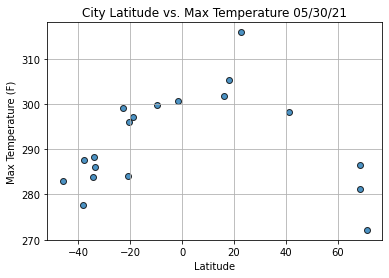

In [14]:
# Impor time module
import time 

# Build the scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

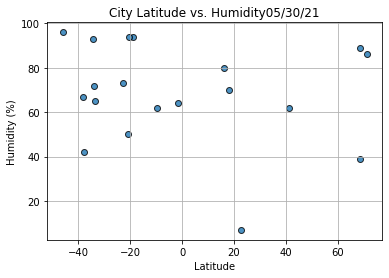

In [15]:
import time 

# Build the scatter plot for latitude vs. max temp
plt.scatter(lats, humidity, edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

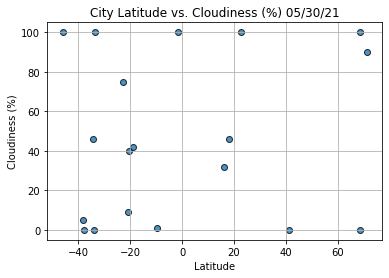

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

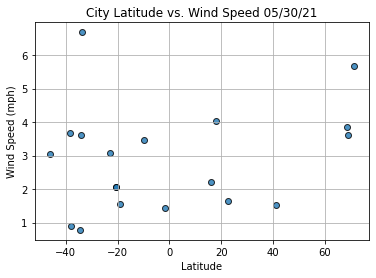

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Northern Hemisphere latitudes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

City Country                 Date      Lat       Lng  Max Temp  \
0            Lekoni      GA  2021-05-30 18:49:19  -1.5843   14.2591    300.57   
1            Atuona      PF  2021-05-30 18:49:20  -9.8000 -139.0333    299.69   
2             Alofi      NU  2021-05-30 18:49:22 -19.0595 -169.9187    297.09   
4         Tuatapere      NZ  2021-05-30 18:49:25 -46.1333  167.6833    283.05   
6         Mahebourg      MU  2021-05-30 18:49:27 -20.4081   57.7000    296.07   
7   Arraial Do Cabo      BR  2021-05-30 18:49:29 -22.9661  -42.0278    299.13   
9        Bredasdorp      ZA  2021-05-30 18:49:31 -34.5322   20.0403    283.77   
10        Mount Isa      AU  2021-05-30 18:49:33 -20.7333  139.5000    284.02   
12   Port Elizabeth      ZA  2021-05-30 18:49:35 -33.9180   25.5701    288.20   
13    Mar Del Plata      AR  2021-05-30 18:45:00 -38.0023  -57.5575    287.59   
15        Busselton      AU  2021-05-30 18:49:39 -33.6500  115.3333    285.98   
17       Codrington      AU  2021-05-30 18:49:42 -38.2667  141.9667    277.76   

    Humidity  Cloudiness  Wind Speed  
0         64         100        1.43  
1         62           1        3.47  
2         94          42        1.54  
4         96         100        3.04  
6         94          40        2.06  
7         73          75        3.09  
9         93          46        0.78  
10        50           9        2.06  
12        72           0        3.60  
13        42           0        0.89  
15        65         100        6.68  
17        67           5        3.68

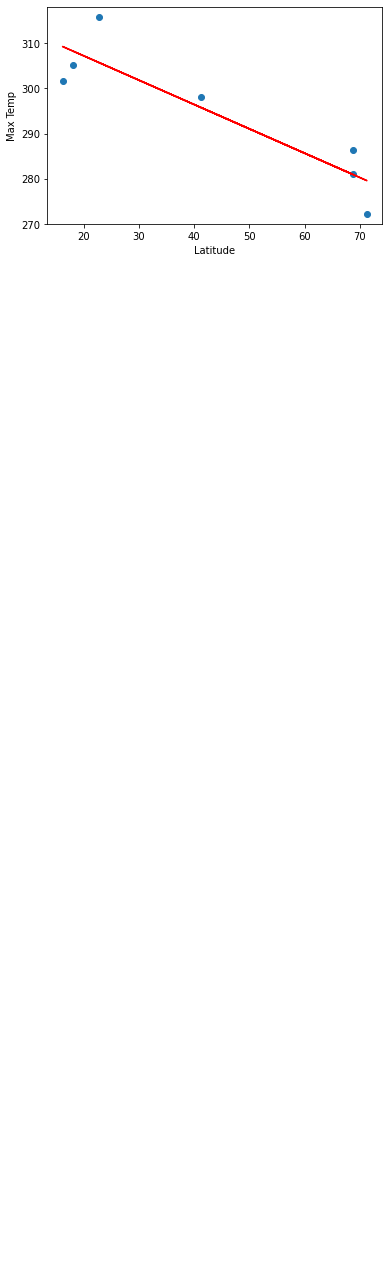

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

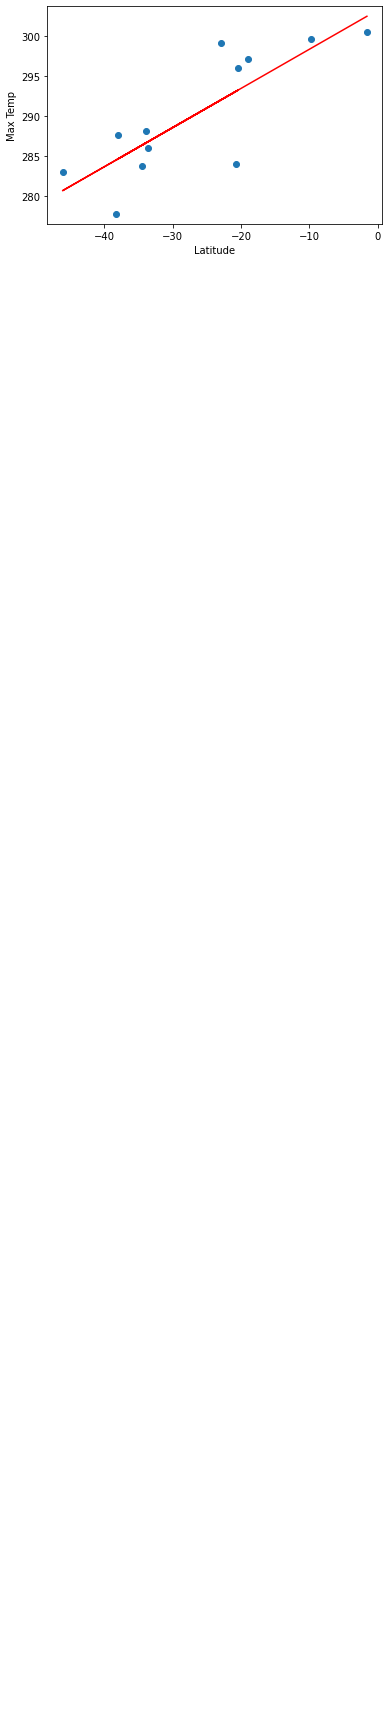

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

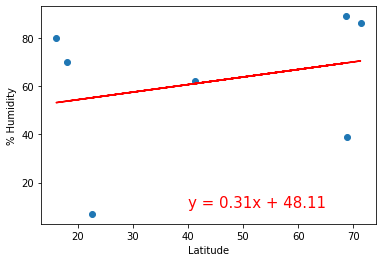

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

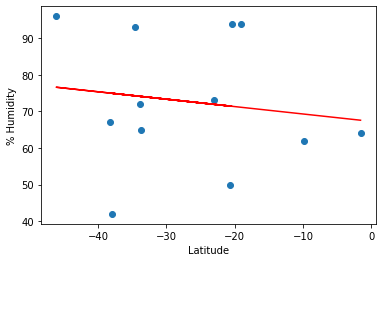

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

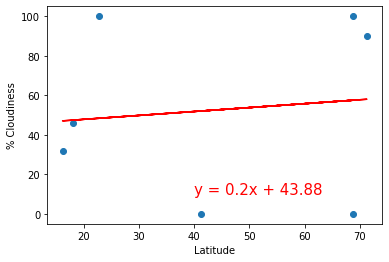

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

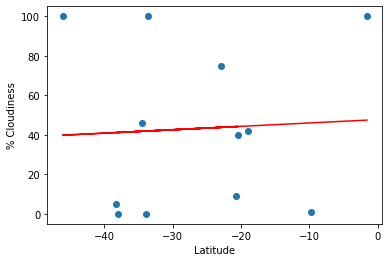

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

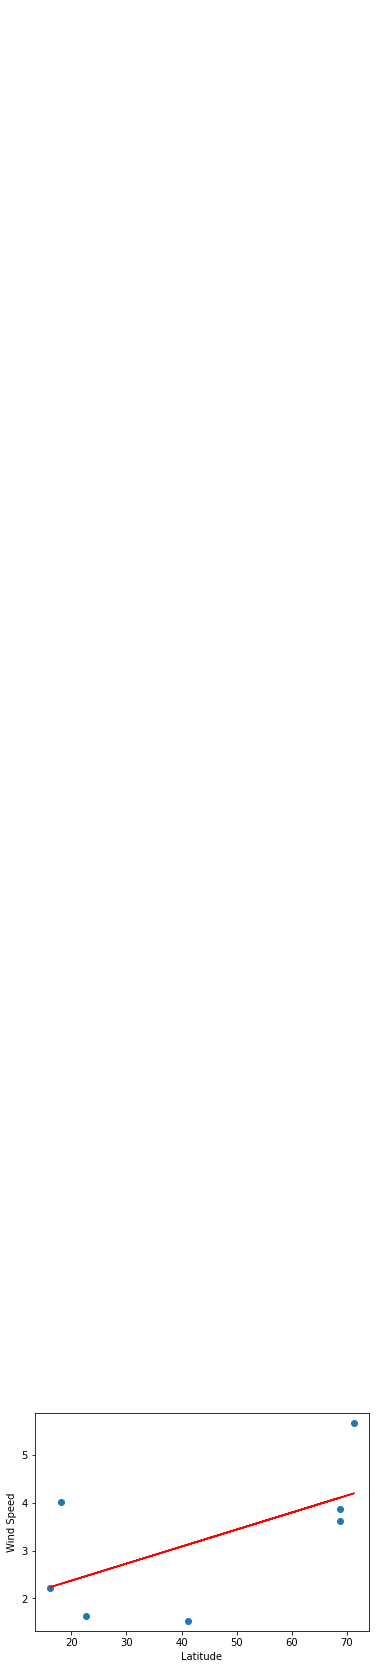

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

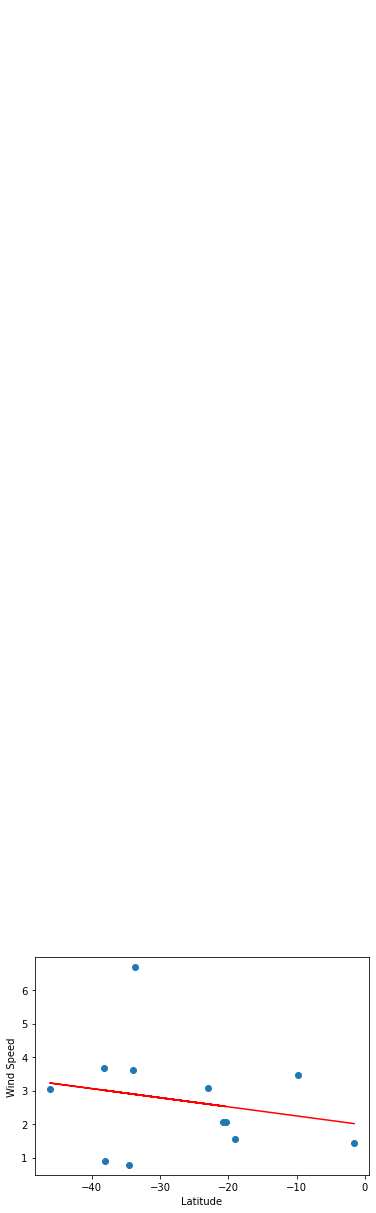

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
# 6.5.2